In [2]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [3]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

# Load model trained with caffe pretrained model

In [4]:
trainer.load('./checkpoints/fasterrcnn_02071907_0.7010876357676961')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model

In [5]:
img = read_image('misc/demo.jpg')
img = t.from_numpy(img)[None]

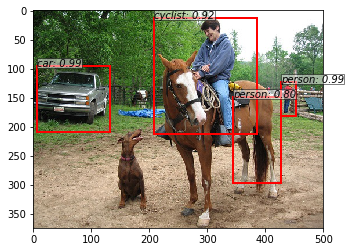

In [6]:
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

# Display a Kitti image

In [7]:
img = read_image('/home/tadenoud/Documents/kitti/data_object_image_2/training/image_2/005009.png')
img = t.from_numpy(img)[None]

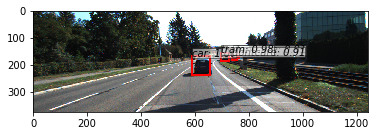

In [8]:
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

In [9]:
# Read a Kitti GT label
from data.util import read_bbox

bboxes, labels = read_bbox('/home/tadenoud/Documents/kitti/data_object_label_2/training/label_2/005009.txt')

tensor([[175.2608, 596.4228, 239.8549, 663.8242],
        [165.1472, 599.8298, 238.7639, 659.4139],
        [168.2534, 603.0663, 236.5316, 653.6226],
        [165.1618, 599.8582, 235.5502, 656.2506],
        [171.7682, 600.9584, 235.9661, 655.2970],
        [174.8336, 596.5261, 240.0696, 663.9773],
        [174.8306, 596.5469, 240.4001, 663.6559],
        [174.6537, 596.2780, 239.9121, 663.9109],
        [169.7584, 600.2480, 230.5161, 662.1760],
        [164.9126, 600.6223, 237.2033, 658.5637],
        [175.3008, 598.5429, 237.6946, 657.9411],
        [168.3375, 598.4079, 233.8467, 660.9749],
        [173.5550, 599.0214, 238.3232, 657.2430],
        [174.8672, 596.4788, 240.0409, 663.5770],
        [174.8673, 596.5875, 239.8948, 663.8371],
        [174.8720, 596.4339, 240.4141, 663.8813],
        [175.0064, 596.4754, 240.1830, 663.9630],
        [174.9403, 596.4509, 239.9668, 664.0119],
        [175.0472, 596.6089, 240.1361, 664.0500],
        [175.1541, 596.7617, 239.9056, 664.0164],


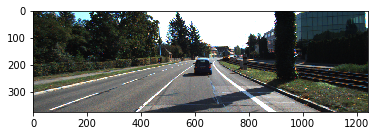

In [10]:
_bboxes, _labels, _scores = trainer.faster_rcnn.test_bbox_injection(img, bboxes, labels, visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

In [ ]:
_bboxes

In [ ]:
_labels

In [ ]:
_scores

In [ ]:
cls_locs = trainer.faster_rcnn.train_ood(img, bboxes, labels, visualize=False)

In [ ]:
cls_locs.shape

In [ ]:
print(trainer.faster_rcnn)

In [ ]:
list(list(trainer.faster_rcnn.head.children())[0].children())[:]